In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm

MAX_ITER = 1000
points_x = []
points_y = []
successive_euclid_distances = []
vals = []
strt = (10,10)

def gradient_descent(func, grad_func, point_pre, learning_rate, precision):
    curr_a = point_pre[0]
    curr_b = point_pre[1]

    res_curr = func(curr_a, curr_b)
    res_pre = res_curr ** 2 + 100

    iter_nmb = 0
    # Performing Gradient Descent
    while(abs(res_curr - res_pre) >= precision) and iter_nmb < MAX_ITER:
        points_x.append(curr_a)
        points_y.append(curr_b)
        vals.append(res_curr)

        iter_nmb += 1

        point_pre = (curr_a, curr_b)
        res_pre = res_curr

        grad = grad_func[0](curr_a, curr_b), grad_func[1](curr_a, curr_b)

        curr_a = curr_a - learning_rate * grad[0]
        curr_b = curr_b - learning_rate * grad[1] 
        res_curr = func(curr_a, curr_b)

        successive_euclid_distances.append(math.sqrt((curr_a - point_pre[0]) ** 2 + (curr_b - point_pre[1]) ** 2))
    
    return (res_curr, point_pre, iter_nmb)

f = lambda x,y: x**2 + y**2 + 1
df = (
    lambda x,y: 2 * x,
    lambda x,y: 2 * y
)

result = gradient_descent(f, df, strt, 0.1, 0.001)
result

(1.0011692013098648, (0.030223145490365734, 0.030223145490365734), 27)

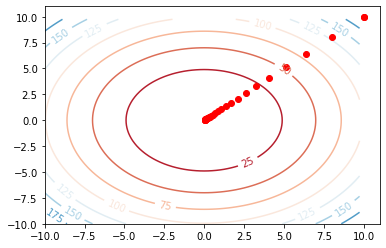

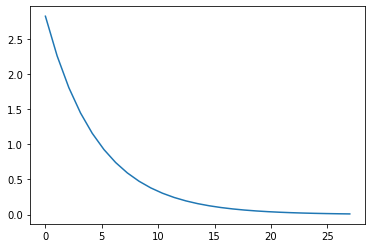

In [14]:
def contour_plot(x_seq, y_seq, x1):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

x = np.arange(-10, 10, 0.25)
y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

def draw_approx_quality(euclid_distances, iters):
    iter_arr = np.linspace(0, iters, iters)
    plt.plot(iter_arr, euclid_distances)
    plt.show()


contour_plot(points_x, points_y, strt)
draw_approx_quality(successive_euclid_distances, result[2])

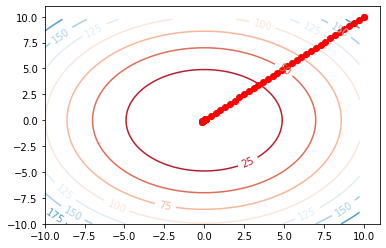

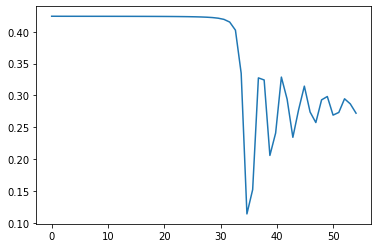

In [34]:
EPSILON = 0.000000001

MAX_ITER = 500
points_x = []
points_y = []
successive_euclid_distances = []
vals = []
strt = (10,10)

def adam_optimization(func, grad, point_pre, learning_rate, precision, m_decay, v_decay):
    point_curr = (point_pre[0], point_pre[1])

    m = (0,0)
    v = (0,0)

    res_curr = func(point_curr[0], point_curr[1])
    res_pre = res_curr ** 2 + 100

    iter_nmb = 0
    # Performing Gradient Descent
    while(abs(res_curr - res_pre) >= precision) and iter_nmb < MAX_ITER:
        iter_nmb += 1
        points_x.append(point_curr[0])
        points_y.append(point_curr[1])
        vals.append(res_curr)

        m = (m_decay * m[0] + (1-m_decay) * grad[0](point_curr[0], point_curr[1]), m_decay * m[1] + (1-m_decay) * grad[1](point_curr[0], point_curr[1]))
        v = (v_decay * v[0] + (1-v_decay) * (grad[0](point_curr[0], point_curr[1]) ** 2), v_decay * v[1] + (1-v_decay) * (grad[1](point_curr[0], point_curr[1]) ** 2))

        m_corr = (m[0] / (1-m_decay ** iter_nmb), m[1] / (1-m_decay ** iter_nmb))
        v_corr = (v[0] / (1-v_decay ** iter_nmb), v[1] / (1-v_decay ** iter_nmb))

        point_pre = point_curr[0], point_curr[1]
        point_curr = (point_curr[0] - learning_rate * m_corr[0] / (math.sqrt(v_corr[0]) + EPSILON), point_curr[1] - learning_rate * m_corr[1] / (math.sqrt(v_corr[1]) + EPSILON))

        res_pre = res_curr
        res_curr = func(point_curr[0], point_curr[1])

        successive_euclid_distances.append(math.sqrt((point_curr[0] - point_pre[0]) ** 2 + (point_curr[1] - point_pre[1]) ** 2))
    
    return (res_curr, point_pre, iter_nmb)

result_adam = adam_optimization(f, df, strt, 0.3, 0.001, 0.2, 0.2)

contour_plot(points_x, points_y, strt)
draw_approx_quality(successive_euclid_distances, result_adam[2])